<a href="https://colab.research.google.com/github/ocean5apphotmail/AiLearning/blob/master/Deep_Learning_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color = 'silver'>第2章 感知机</font>



图2-1是一个接收两个输入信号的感知机的例子。x1、x2是输入信号，
y是输出信号，w1、w2是权重（w是weight的首字母）。图中的○称为“神
经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重
（w1x1、w2x2）。神经元会计算传送过来的信号的总和，只有当这个总和超过
了某个界限值时，才会输出1。这也称为“神经元被激活”。这里将这个界
限值称为阈值，用符号θ表示

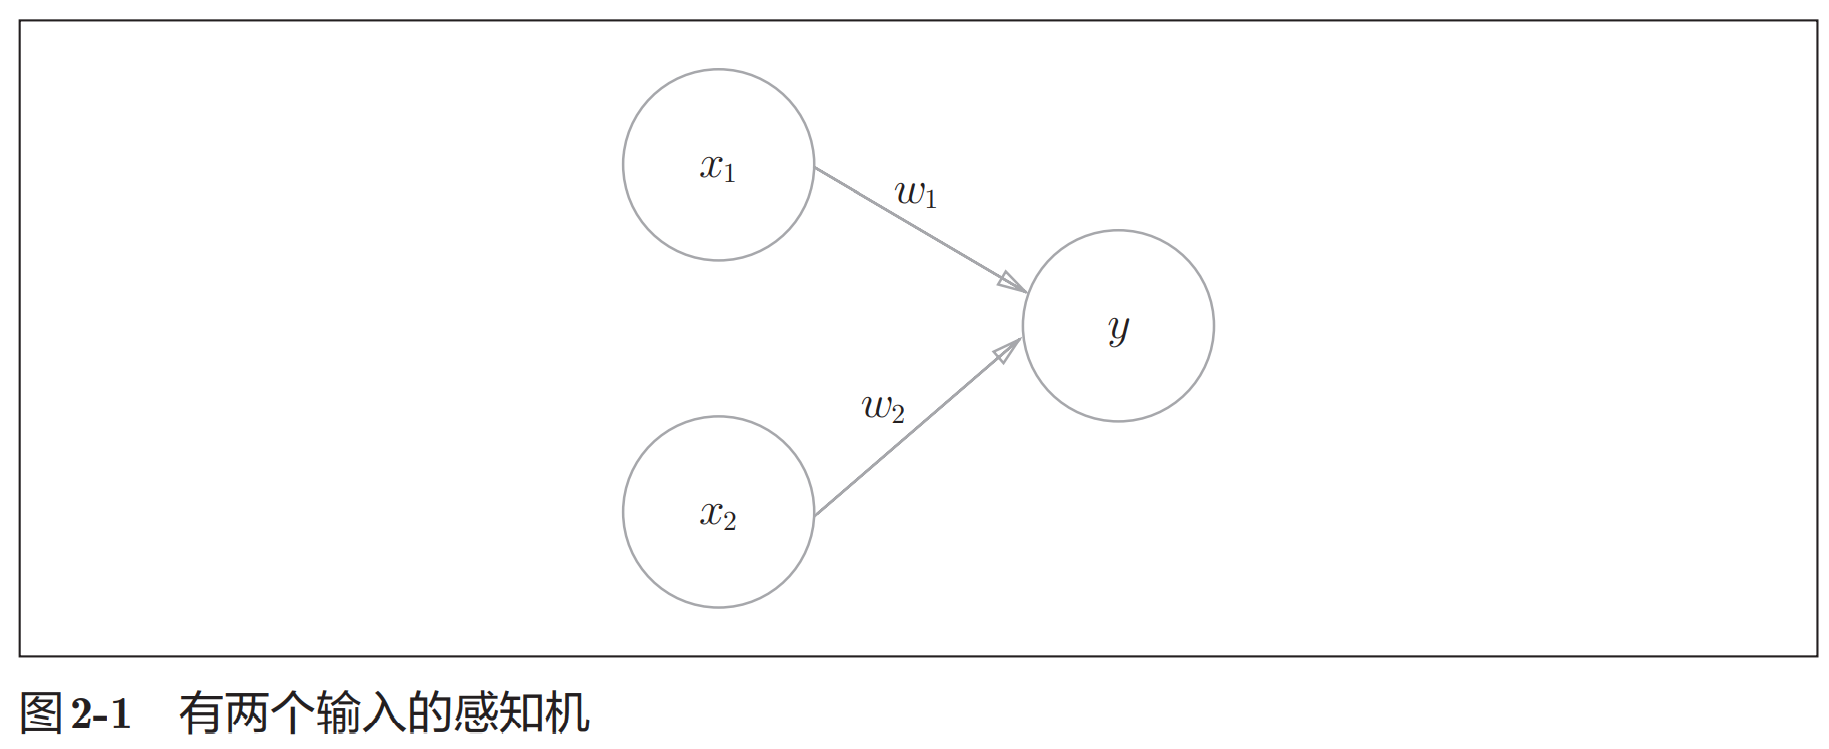


<font size = 14>1. y = 0 (w1x1 + w2x2 <= θ)</font>

<font size = 14>2. y = 1 (w1x1 + w2x2 > θ) </font>

## <font color = 'silver'>2.2 简单逻辑电路</font>
#### <font color = 'silver'>2.2.1　与门</font>


| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |
图2-2

满足图2-2的条件的参数的选择方法有无数多个。比如，当
(w1, w2, θ) = (0.5, 0.5, 0.7) 时，可以满足图 2-2 的条件。此外，当 (w1, w2, θ)
为(0.5, 0.5, 0.8)或者(1.0, 1.0, 1.0)时，同样也满足与门的条件。设定这样的
参数后，仅当x1和x2同时为1时，信号的加权总和才会超过给定的阈值θ。

#### <font color = 'silver'>2.2.2　与非门和或门</font>

NAND是Not AND的意思，与非门就是颠倒了与门的输出。

要表示与非门，可以用(w1, w2, θ) = (−0.5, −0.5, −0.7)这样的组合（其
他的组合也是无限存在的）。实际上，只要把实现与门的参数值的符号取反，
就可以实现与非门

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
图2-3 与非门的真值表

或门是“只要有一个输入信号是1，输出就为1”的逻辑电路。

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |
图2-4 或门的真值表

## <font color = 'silver'>2.3 感知机的实现</font>
#### <font color = 'silver'>2.3.1　简单的实现</font>



In [2]:
# 与门
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


这里把−θ命名为偏置b，但是请注意，偏置和权重w1、w2的作用是不
一样的。具体地说，w1和w2是控制输入信号的重要性的参数，而偏置是调
整神经元被激活的容易程度（输出信号为1的程度）的参数。比如，若b为
−0.1，则只要输入信号的加权总和超过0.1，神经元就会被激活。但是如果b
为−20.0，则输入信号的加权总和必须超过20.0，神经元才会被激活。像这样，
偏置的值决定了神经元被激活的容易程度。另外，这里我们将w1和w2称为权重，
将b称为偏置，但是根据上下文，有时也会将b、w1、w2这些参数统称为权重。

In [3]:
# 与非门
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [4]:
# 或门
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## <font color = 'silver'>2.4 感知机的局限性</font>
#### <font color = 'silver'>2.4.1　异或门</font>


异或门也被称为逻辑异或电路。如图2-5所示，仅当x1或x2中的一方为
1时，才会输出1（“异或”是拒绝其他的意思）。那么，要用感知机实现这个
异或门的话，应该设定什么样的权重参数呢？

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
图2-5　异或门的真值表

异或门的制作方法有很多，其中之一就是组合我们前面做好的与门、与
非门、或门进行配置。这里，与门、与非门、或门用图2-9中的符号表示。另外，
图2-9中与非门前端的○表示反转输出的意思。

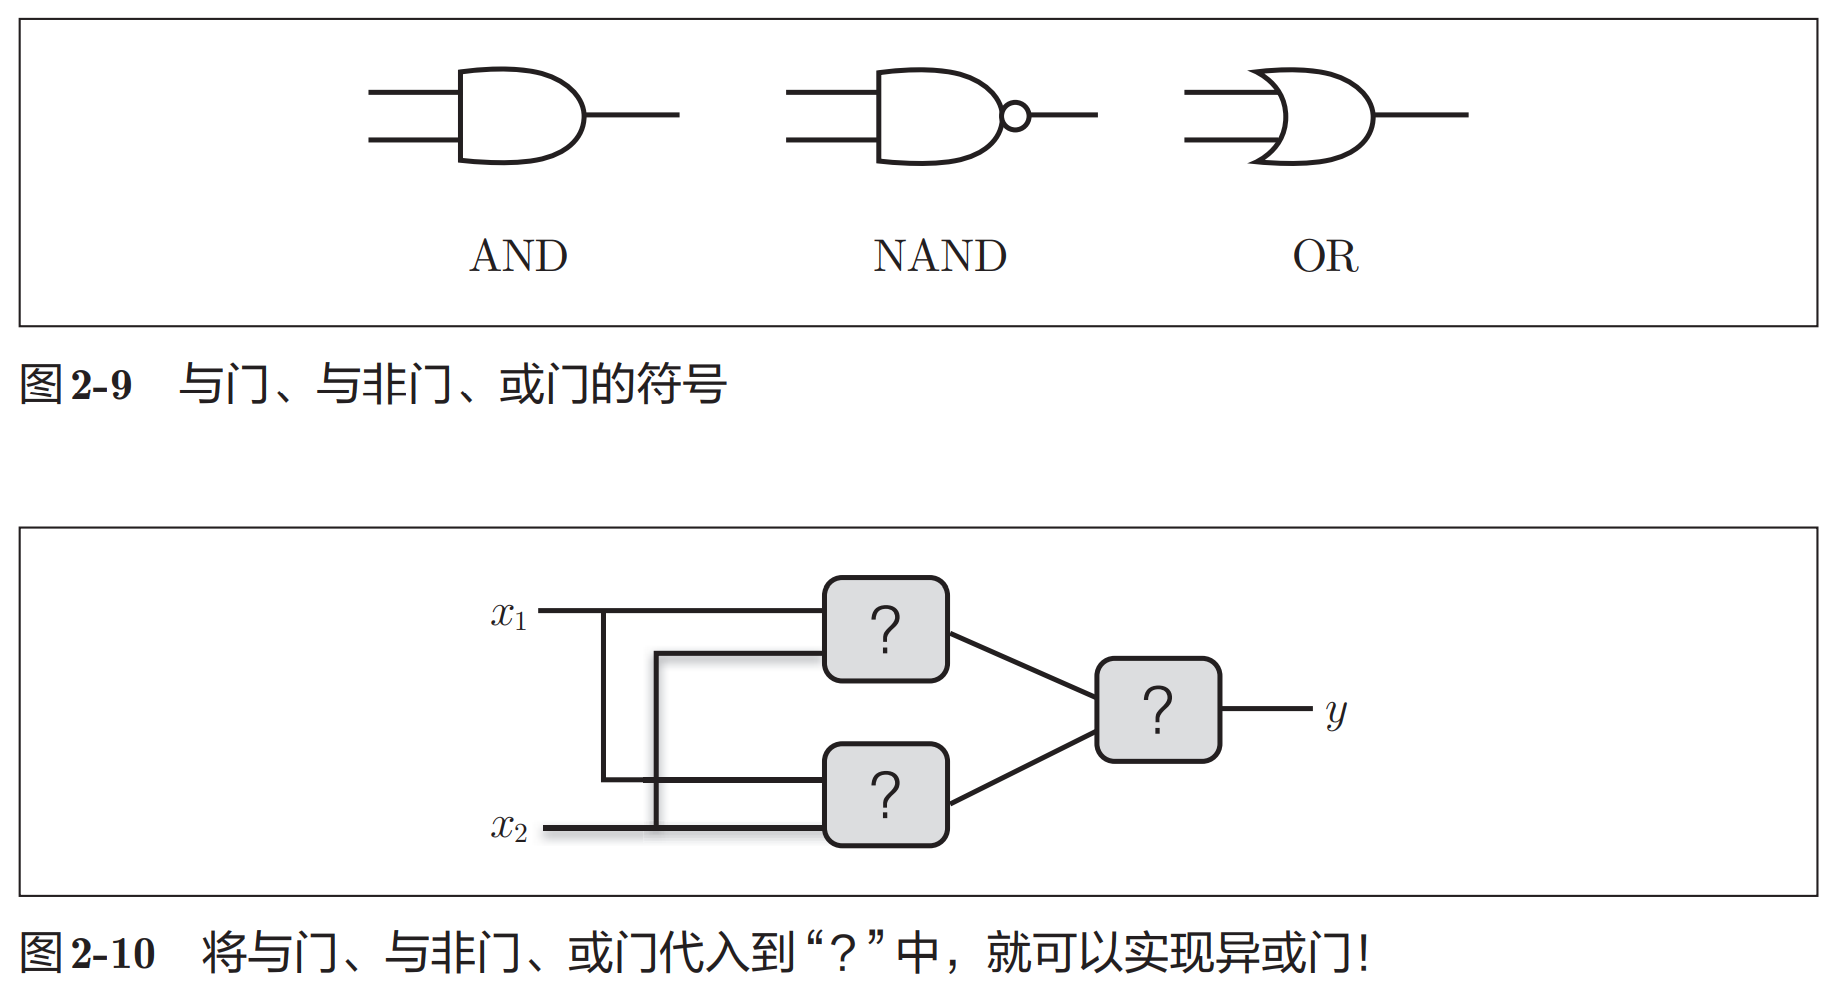

异或门可以通过图2-11所示的配置来实现。这里，x1和x2表示输入信号，
y表示输出信号。x1和x2是与非门和或门的输入，而与非门和或门的输出则
是与门的输入。

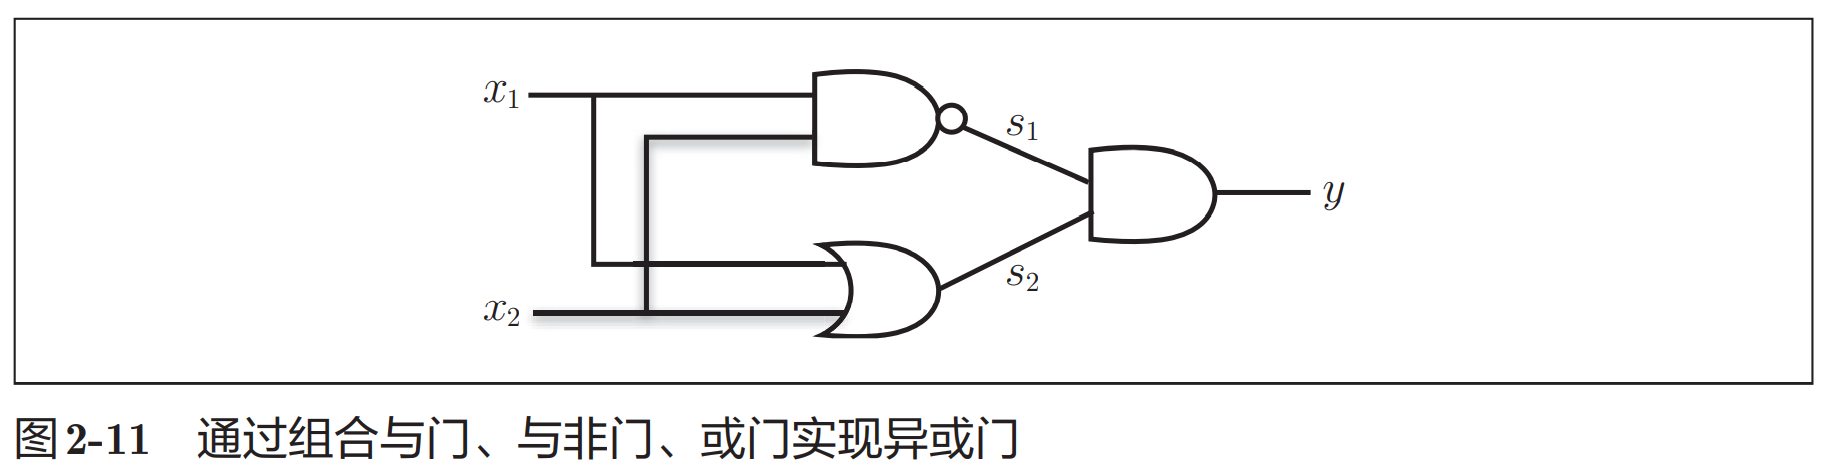

| X1 | X2 | S1 | S2 | Y |
| ------ | ------ | ------ | ------ | ------ |
| 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 1 |
| 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 0 |
图2-12　异或门的真值表

In [5]:
# 异或门

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# <font color = 'silver'>第3章 神经网络</font>

#### <font color = 'silver'>3.1.3　激活函数登场</font>


h（x）函数会将输入信号的总和转换为输出信号，这种函数
一般称为激活函数（activation function）。如“激活”一词所示，激活函数的
作用在于决定如何来激活输入信号的总和

<font size = 14>1. a = b + w1x1 + w2x2 （3.4）</font>

<font size = 14>2. y = h(a) （3.5） </font>

式（3.4）计算加权输入信号和偏置的总和，记为a。然后，式（3.5）
用h()函数将a转换为输出y。


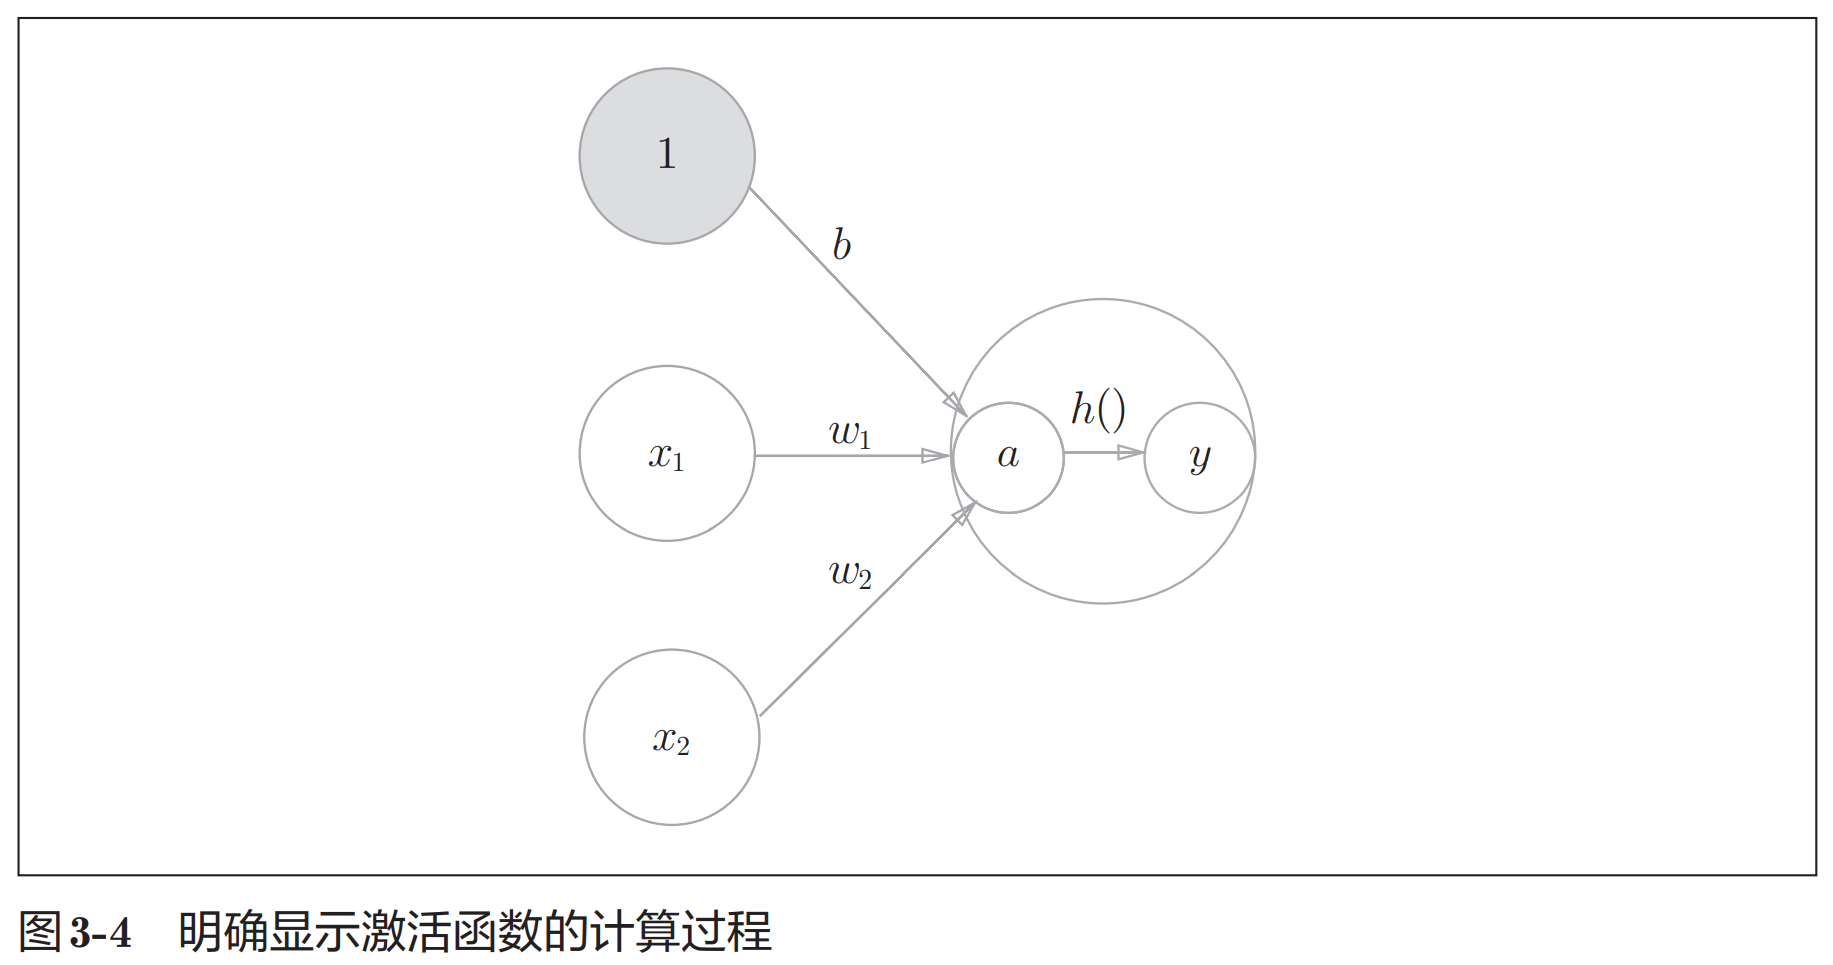

#### <font color = 'silver'>3.2 激活函数</font>

激活函数以阈值为界，一旦输入超过阈值，就切换输出。
这样的函数称为“阶跃函数”。因此，可以说<font color=red>感知机中使用了阶跃函数作为
激活函数</font>。也就是说，在激活函数的众多候选函数中，感知机使用了阶跃函数。
那么，如果感知机使用其他函数作为激活函数的话会怎么样呢？实际上，如
果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。下
面我们就来介绍一下神经网络使用的激活函数。
<font color=red>感知机和接下来要介绍的神经网络的主要区别就在于这个激活函数</font>

#### <font color = 'silver'>3.2.1　sigmoid函数</font>

神经网络中经常使用的一个激活函数就是式（3.6）表示的sigmoid函数
（sigmoid function）

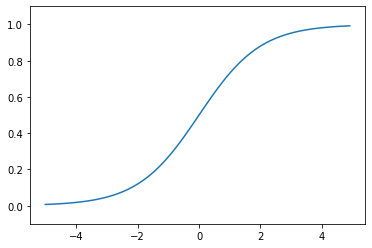

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### <font color = 'silver'>3.2.2　阶跃函数的实现</font>

可以用astype()方法转换NumPy数组的类型。astype()方
法通过参数指定期望的类型，这个例子中是np.int型。Python中将布尔型
转换为int型后，True会转换为1，False会转换为0。以上就是阶跃函数的
实现中所用到的NumPy的“技巧”。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


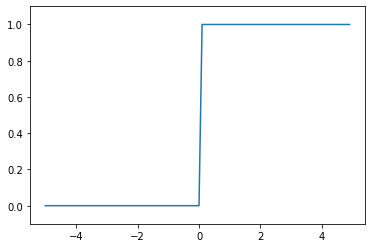

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 指定图中绘制的y轴的范围
plt.show()

#### <font color = 'silver'>3.2.5　sigmoid函数和阶跃函数的比较</font>

如果把这两个函数与水联系起来，则阶跃函数可以比作“竹筒敲石”A，
sigmoid函数可以比作“水车”。阶跃函数就像竹筒敲石一样，只做是否传送
水（0或1）两个动作，而sigmoid函数就像水车一样，根据流过来的水量相应
地调整传送出去的水量。

接着说一下阶跃函数和sigmoid函数的共同性质。阶跃函数和sigmoid
函数虽然在平滑性上有差异，但是如果从宏观视角看图3-8，可以发现它们
具有相似的形状。实际上，两者的结构均是“输入小时，输出接近0（为0）；
随着输入增大，输出向1靠近（变成1）”。也就是说，当输入信号为重要信息时，
阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，
两者都输出较小的值。还有一个共同点是，不管输入信号有多小，或者有多
大，输出信号的值都在0到1之间。

<font color=red>神经网络的激活函数必须使用非线性函数</font>。换句话说，激活函数不能使
用线性函数。为什么不能使用线性函数呢？因为使用线性函数的话，加深神
经网络的层数就没有意义了。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


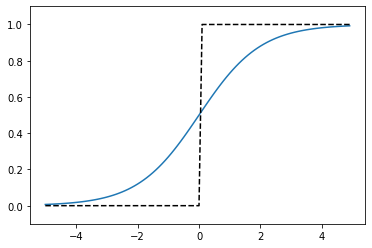

In [8]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) #指定图中绘制的y轴的范围
plt.show()

#### <font color = 'silver'>3.2.7　ReLU函数</font>

sigmoid函数很早就开始被使用了，而最近则主要
使用ReLU（Rectified Linear Unit）函数。
ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输
出0（图3-9）

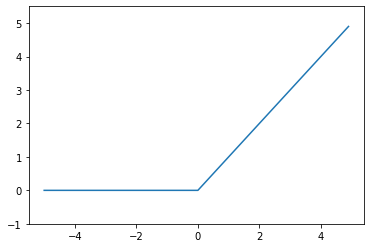

In [9]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

#### <font color = 'silver'>3.4 3层神经网络的实现</font>

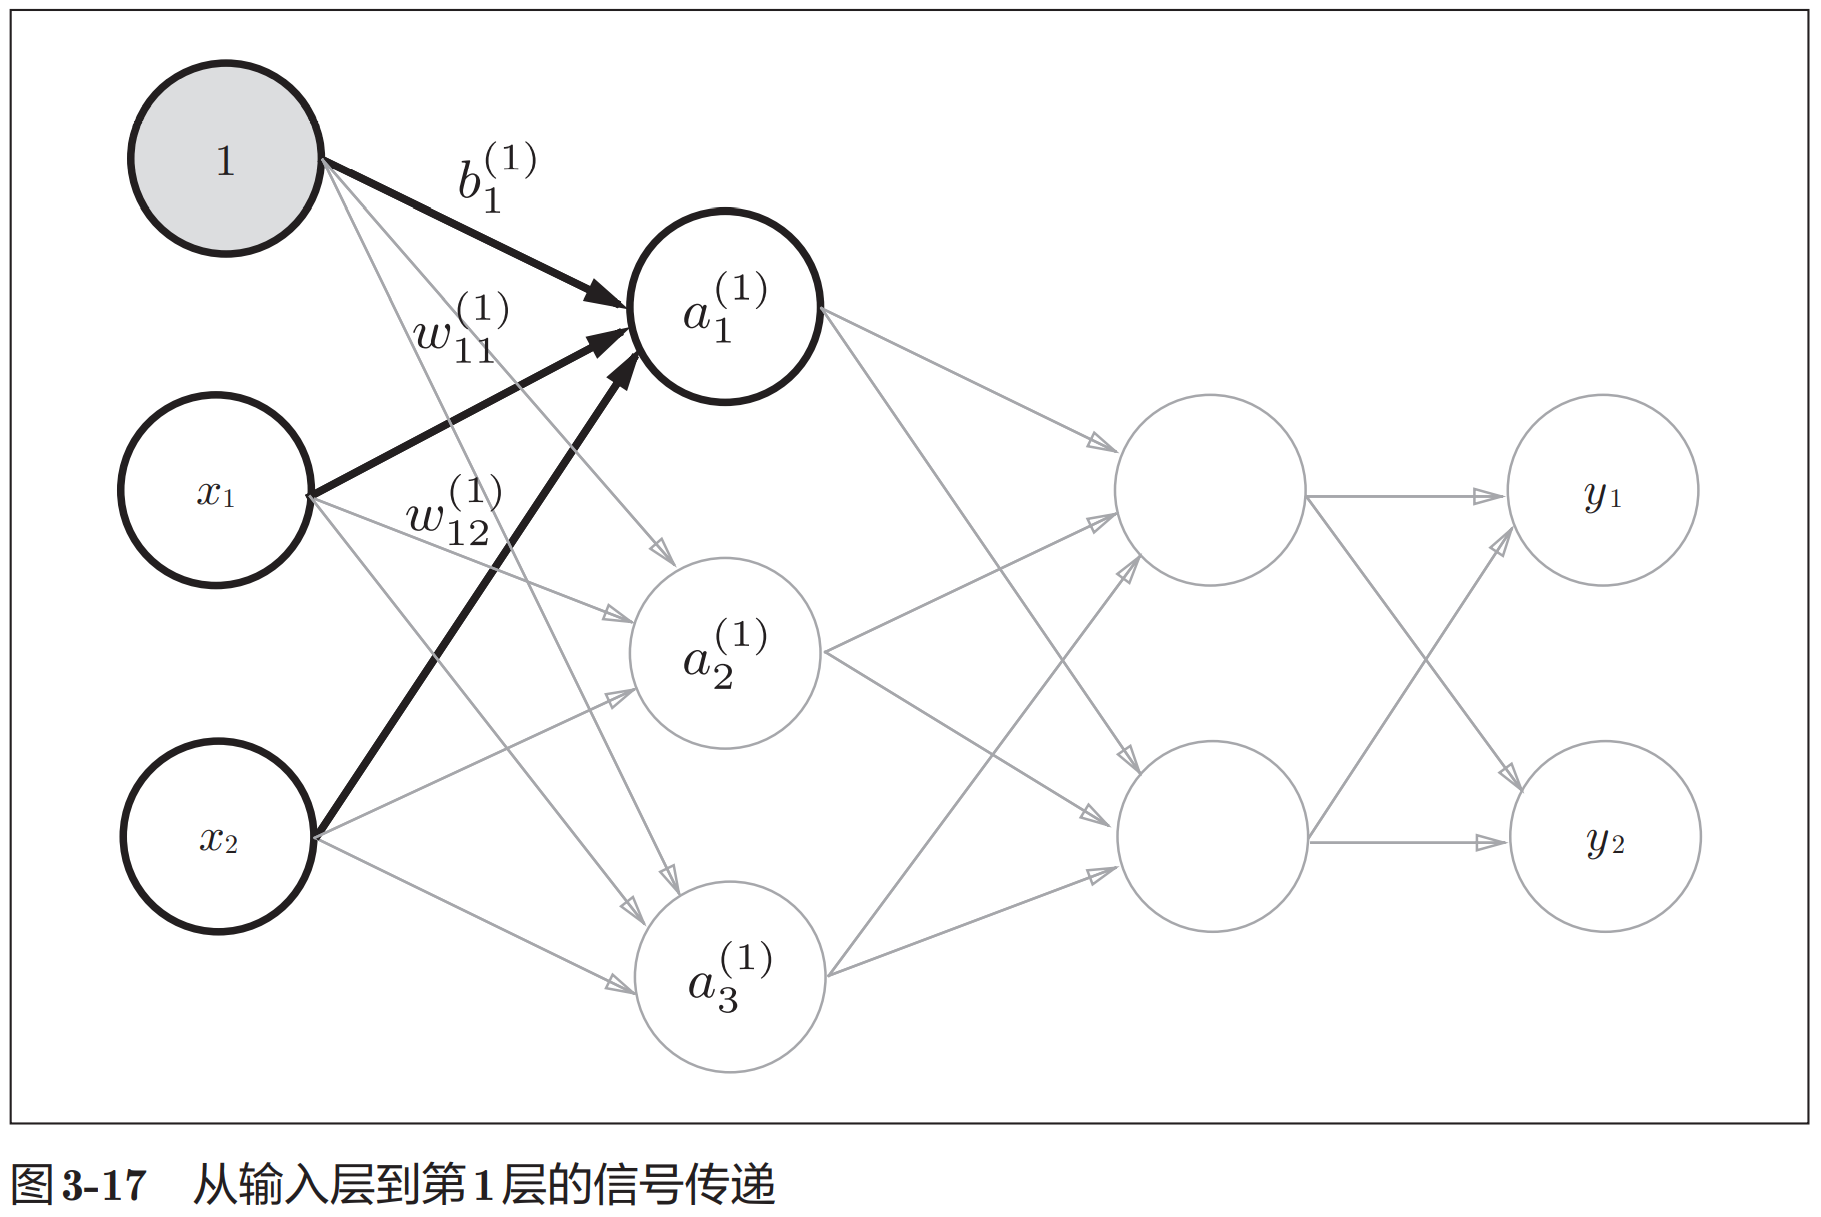

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1

print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


接下来，我们观察第1层中激活函数的计算过程。如果把这个计算过程
用图来表示的话，则如图3-18所示。
如图3-18所示，隐藏层的加权和（加权信号和偏置的总和）用a表示，被
激活函数转换后的信号用z表示。此外，图中h()表示激活函数，这里我们
使用的是sigmoid函数。用Python来实现，代码如下所示。

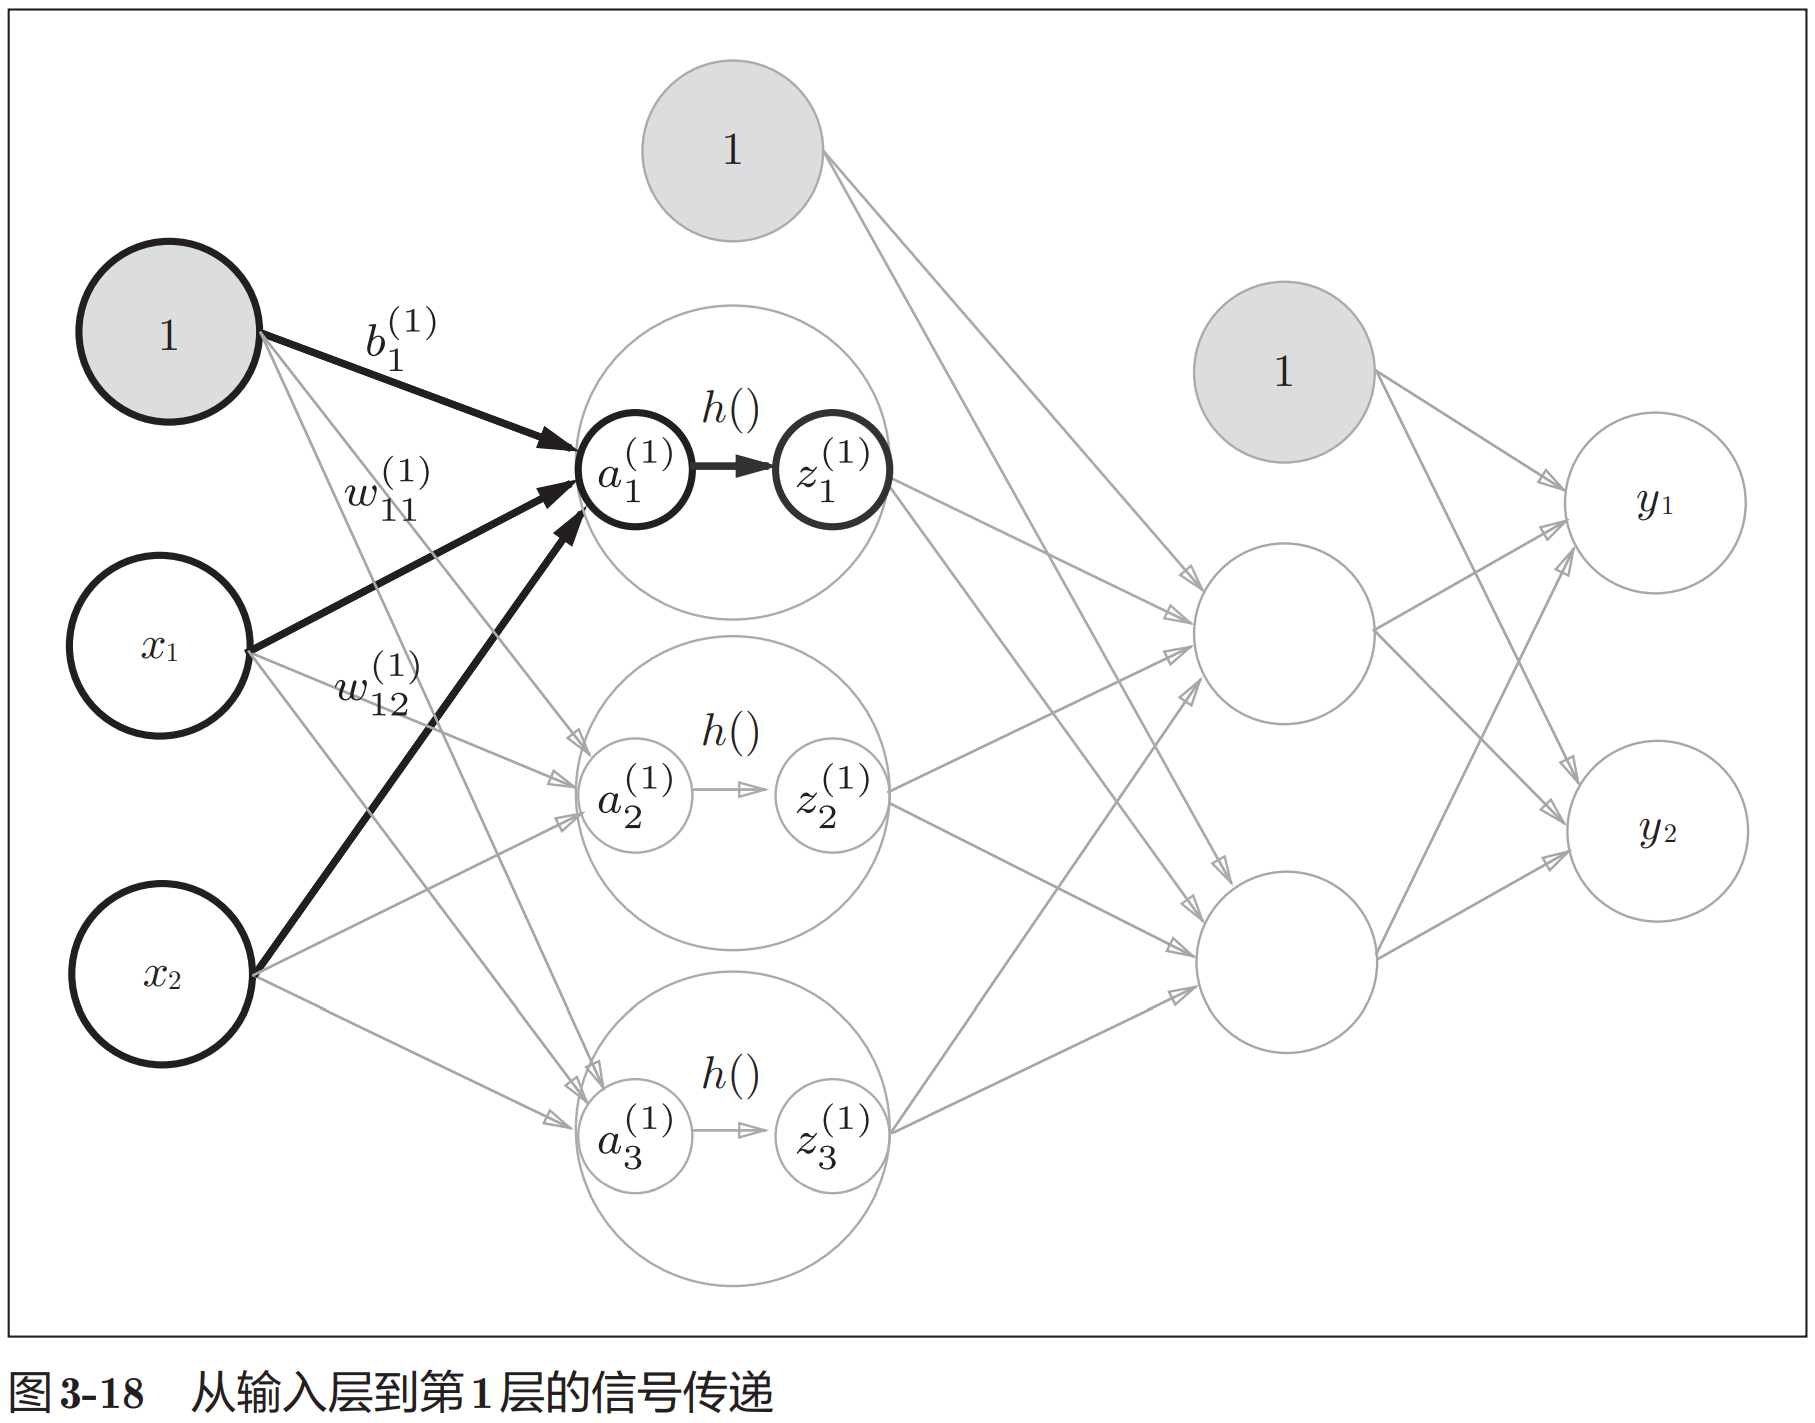

In [11]:
Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


下面，我们来实现第1层到第2层的信号传递（图3-19）

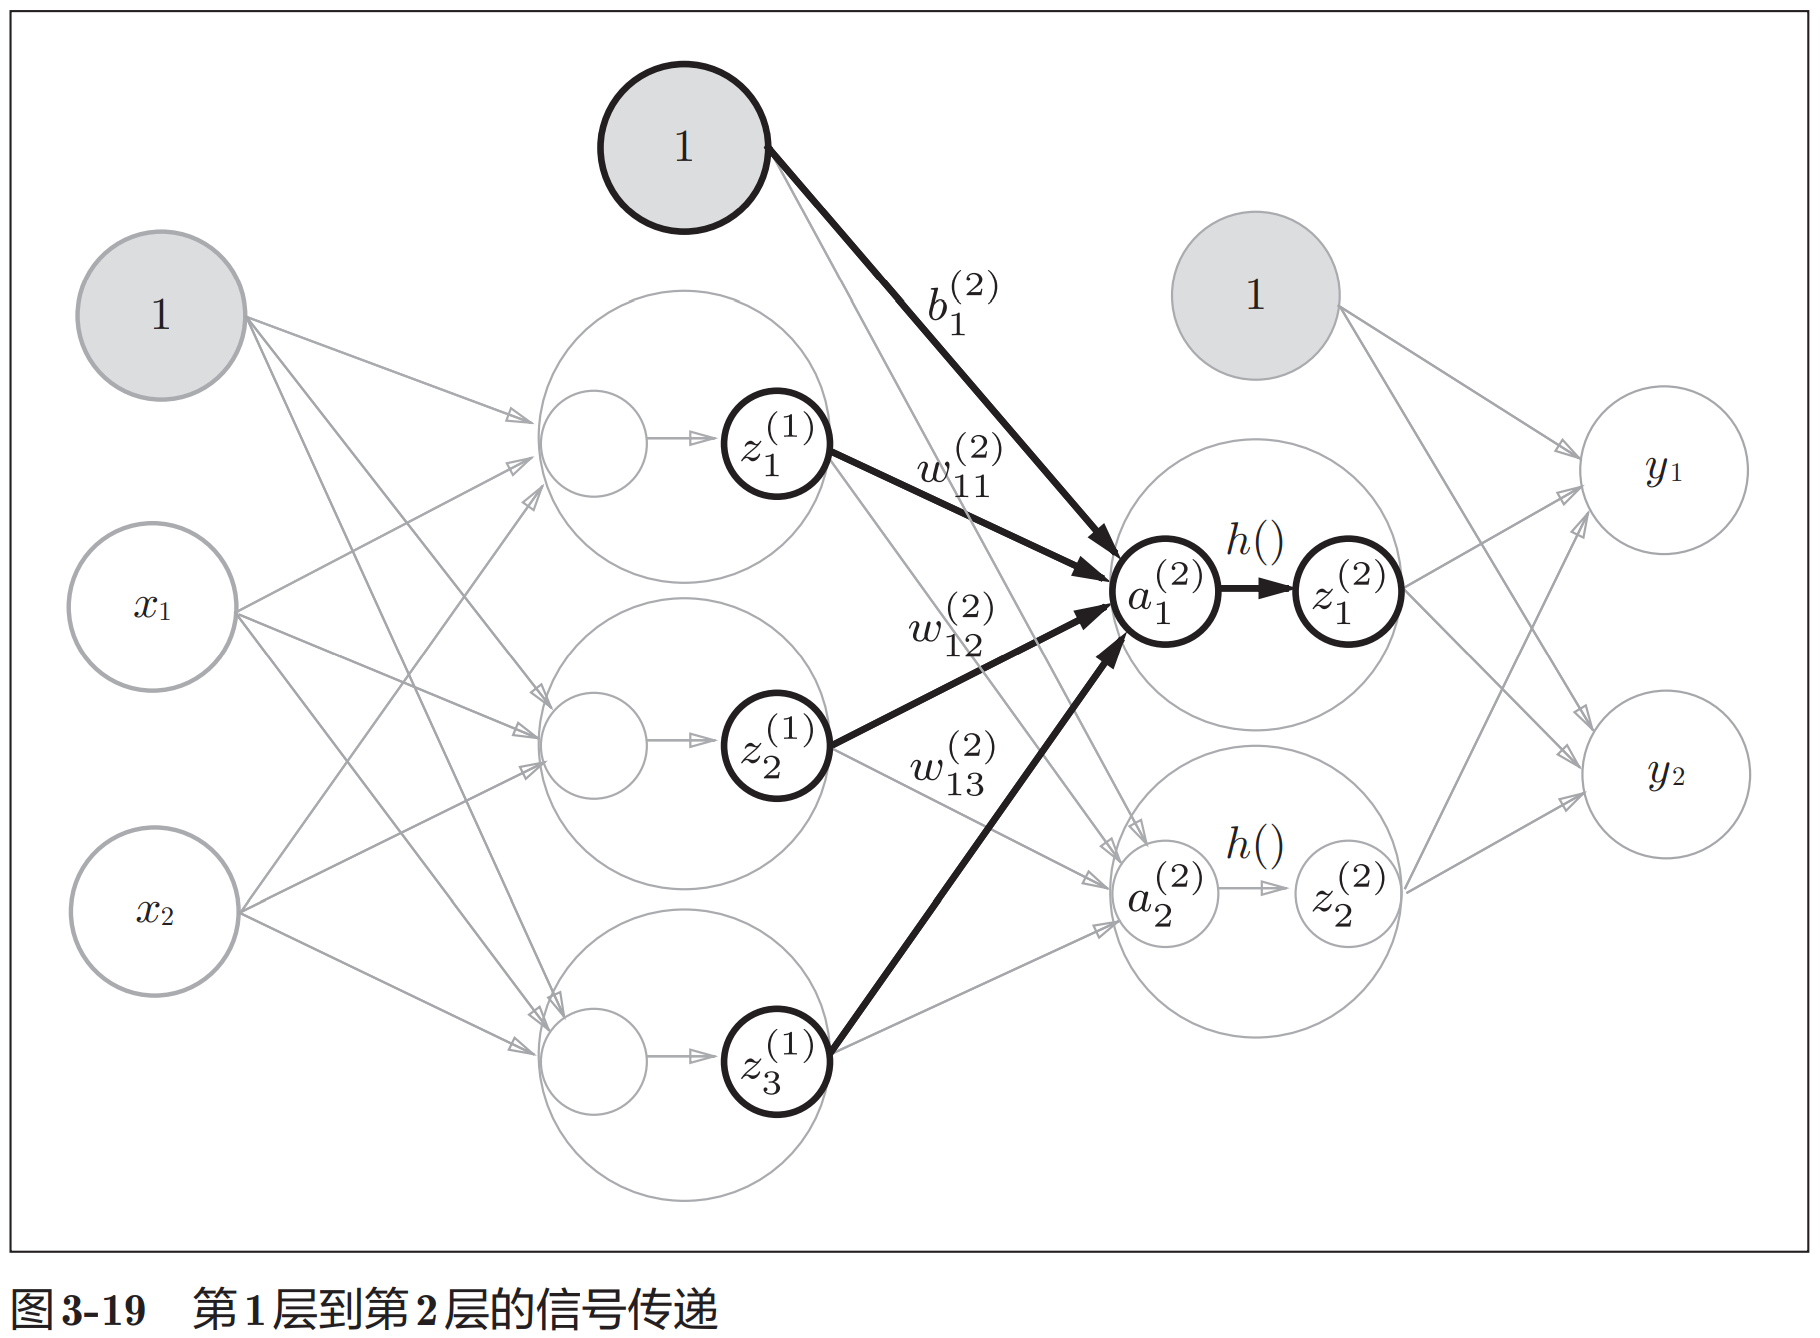

In [12]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


最后是第2层到输出层的信号传递（图3-20）。输出层的实现也和之前的
实现基本相同。不过，最后的激活函数和之前的隐藏层有所不同。

这里我们定义了identity_function()函数（也称为“恒等函数”），并将
其作为输出层的激活函数。恒等函数会将输入按原样输出，因此，这个例子
中没有必要特意定义identity_function()。这里这样实现只是为了和之前的
流程保持统一。另外，图3-20中，输出层的激活函数用σ()表示，不同于隐
藏层的激活函数h()（σ读作sigma）

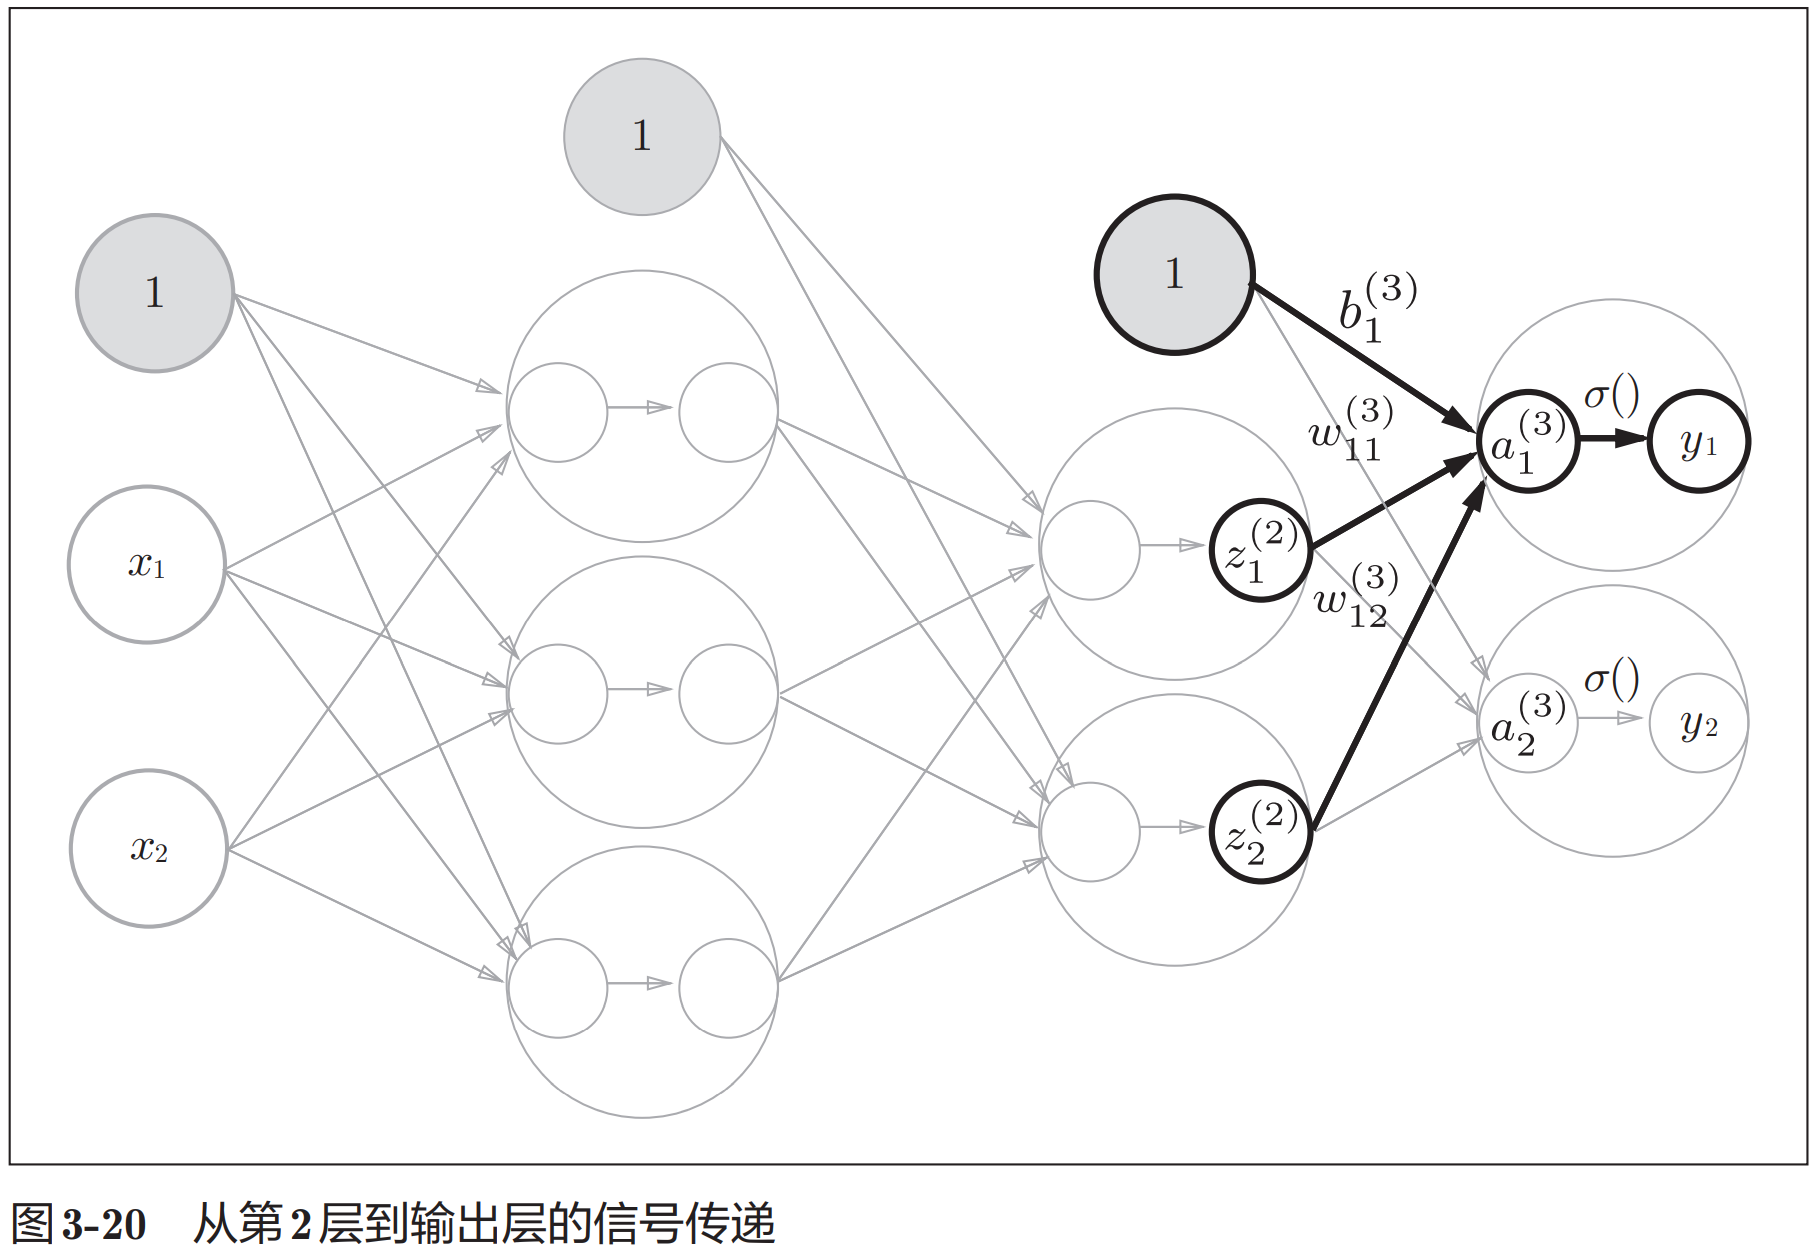

输出层所用的激活函数，要根据求解问题的性质决定。<font color=red>一般地，回
归问题可以使用恒等函数，二元分类问题可以使用 sigmoid函数，
多元分类问题可以使用 softmax函数。</font>关于输出层的激活函数，我
们将在下一节详细介绍。

In [13]:
def identity_function(x):
 return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者Y = A3
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


#### <font color = 'silver'>3.4.3　代码实现小结</font>

这里定义了init_network()和forward()函数。init_network()函数会进
行权重和偏置的初始化，并将它们保存在字典变量network中。这个字典变
量network中保存了每一层所需的参数（权重和偏置）。forward()函数中则封
装了将输入信号转换为输出信号的处理过程。
另外，这里出现了forward（前向）一词，它表示的是从输入到输出方向
的传递处理。后面在进行神经网络的训练时，我们将介绍后向（backward，
从输出到输入方向）的处理。
至此，神经网络的前向处理的实现就完成了。通过巧妙地使用NumPy
多维数组，我们高效地实现了神经网络。

In [14]:
def init_network():
 network = {}
 network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
 network['b1'] = np.array([0.1, 0.2, 0.3])
 network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
 network['b2'] = np.array([0.1, 0.2])
 network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
 network['b3'] = np.array([0.1, 0.2])
 return network
def forward(network, x):
 W1, W2, W3 = network['W1'], network['W2'], network['W3']
 b1, b2, b3 = network['b1'], network['b2'], network['b3']
 a1 = np.dot(x, W1) + b1
 z1 = sigmoid(a1)
 a2 = np.dot(z1, W2) + b2
 z2 = sigmoid(a2)
 a3 = np.dot(z2, W3) + b3
 y = identity_function(a3)
 return y
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


#### <font color = 'silver'>3.5 输出层的设计</font>
#### <font color = 'silver'>3.5.1　恒等函数和 softmax函数</font>

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出
层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。




1.   恒等函数会将输入按原样输出，对于输入的信息，不加以任何改动地直接输出。恒等函数进行的转换处理可以用一根箭头来表示。
2.   分类问题中使用的softmax函数可以用下面的式（3.10）表示。<font color=red>softmax函数的输出解释为“概率”。</font>
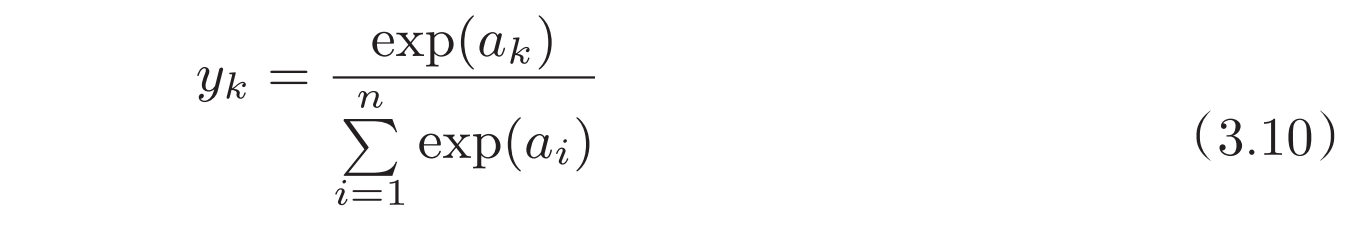





exp(x)是表示ex的指数函数（e是纳皮尔常数2.7182 ...）。式（3.10）表示
假设输出层共有n个神经元，计算第k个神经元的输出yk。如式（3.10）所示，
softmax函数的分子是输入信号ak的指数函数，分母是所有输入信号的指数
函数的和。


In [15]:
def softmax(a):
 exp_a = np.exp(a)
 sum_exp_a = np.sum(exp_a)
 y = exp_a / sum_exp_a
 return y



#### <font color = 'silver'>3.5.2　实现 softmax函数时的注意事项</font>

这里的C可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。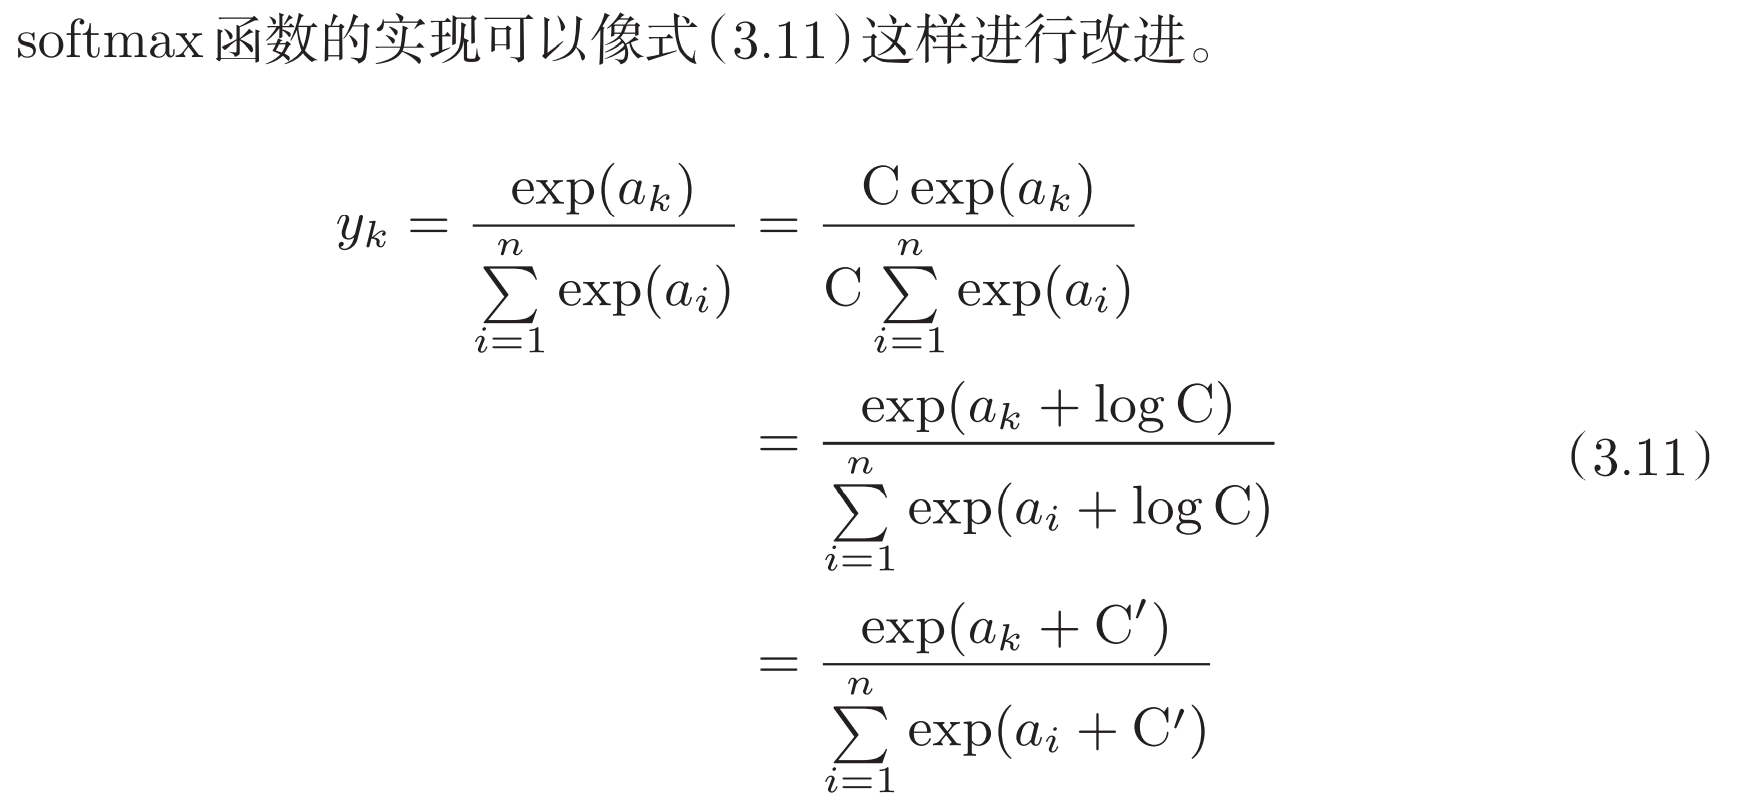

In [16]:
def softmax(a):
 c = np.max(a)
 exp_a = np.exp(a - c) # 溢出对策
 sum_exp_a = np.sum(exp_a)
 y = exp_a / sum_exp_a
 return y

#### <font color = 'silver'>3.6 手写数字识别</font>
#### <font color = 'silver'>3.6.1　MNIST数据集</font>

In [17]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

# dataset_dir = os.path.dirname(os.path.abspath(__file__)) 
dataset_dir = "/content/drive/MyDrive/Deep Learning from Scratch/第三章"
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """读入MNIST数据集
    
    Parameters
    ----------
    normalize : 将图像的像素值正规化为0.0~1.0
    one_hot_label : 
        one_hot_label为True的情况下，标签作为one-hot数组返回
        one-hot数组是指[0,0,1,0,0,0,0,0,0,0]这样的数组
    flatten : 是否将图像展开为一维数组
    
    Returns
    -------
    (训练图像, 训练标签), (测试图像, 测试标签)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    """作为一种预处理，我们将各个像素值除以 255，进行了简单的正规化。
    实际上，很多预处理都会考虑到数据的整体分布。比如，利用数据
    整体的均值或标准差，移动数据，使数据整体以 0为中心分布，或
    者进行正规化，把数据的延展控制在一定范围内。除此之外，还有
    将数据整体的分布形状均匀化的方法，即数据白化（whitening）等。
    """
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [18]:
# coding: utf-8
import sys, os
# sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
sys.path.append("/content/drive/MyDrive/Deep Learning from Scratch/dataset")
# from dataset.mnist import load_mnist 上面直接定义了，不用继续import
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 把图像的形状变为原来的尺寸
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


#### <font color = 'silver'>3.6.2　神经网络的推理处理</font>

In [19]:
# coding: utf-8
import sys, os
sys.path.append("/content/drive/MyDrive/Deep Learning from Scratch/第三章")  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
# from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# sample_weight.pkl这个文件中以字典变量的形式保存了权重和偏置参数。
def init_network():
    with open("/content/drive/MyDrive/Deep Learning from Scratch/第三章/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


用图表示的话，如图3-26所示。可以发现，多维数组的对应
维度的元素个数确实是一致的。此外，我们还可以确认最终的结果是输出了
元素个数为10 的一维数组。
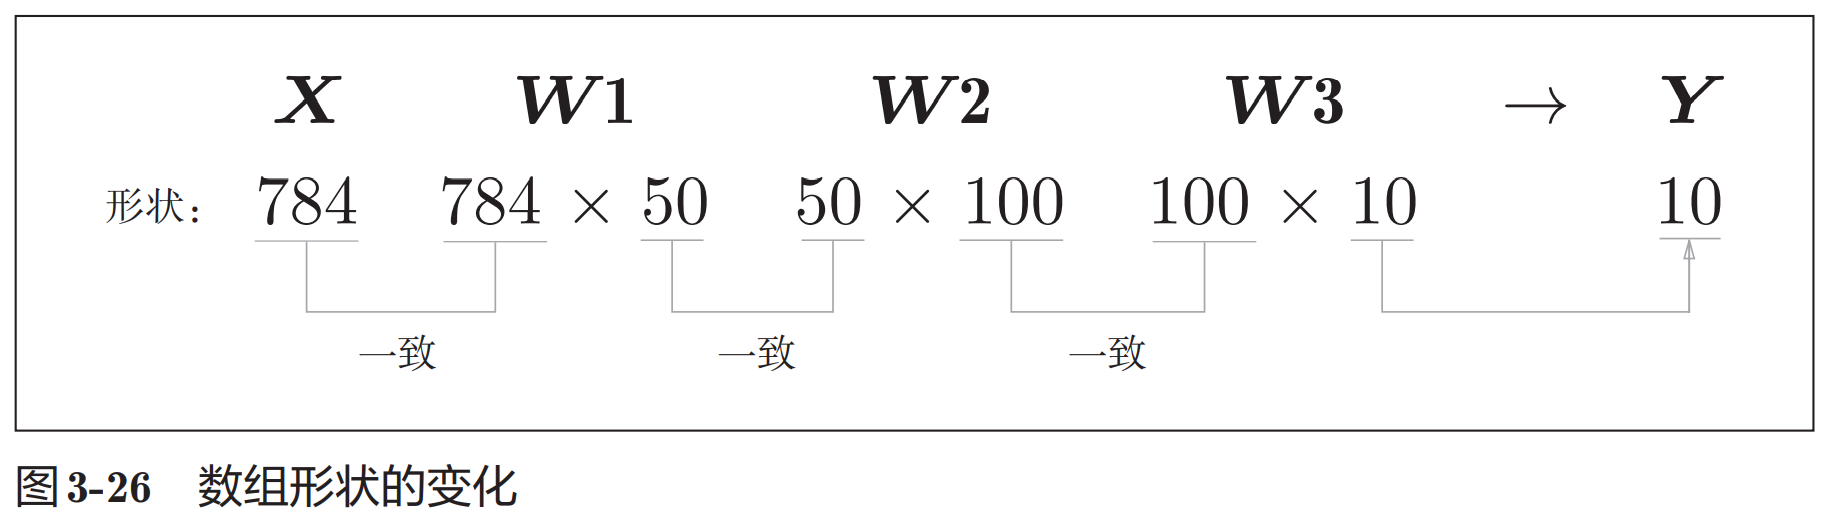

In [20]:
 x, _ = get_data()
 network = init_network()
 W1, W2, W3 = network['W1'], network['W2'], network['W3']
 print(x.shape)
 print(x[0].shape)
 print(W1.shape)
 print(W2.shape)
 print(W3.shape)


(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


#### <font color = 'silver'>3.6.3　批处理</font>

现在我们来考虑打包输入多张图像的情形。比如，我们想用predict()
函数一次性打包处理100张图像。为此，可以把x的形状改为100 × 784，将
100张图像打包作为输入数据。用图表示的话，如图3-27所示。
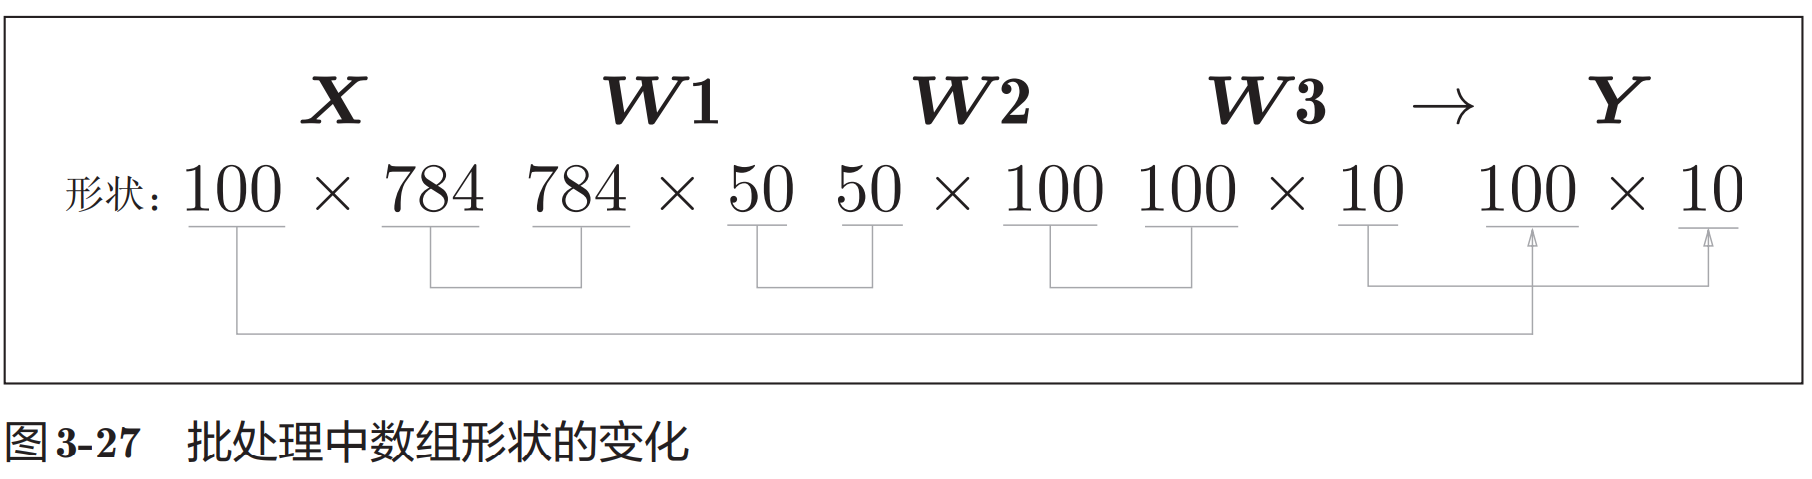

批处理对计算机的运算大有利处，可以大幅缩短每张图像的处理时
间。那么为什么批处理可以缩短处理时间呢？这是因为大多数处理
数值计算的库都进行了能够高效处理大型数组运算的最优化。并且，
在神经网络的运算中，当数据传送成为瓶颈时，批处理可以减轻数
据总线的负荷（严格地讲，相对于数据读入，可以将更多的时间用在
计算上）。也就是说，批处理一次性计算大型数组要比分开逐步计算
各个小型数组速度更快。

In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import pickle
# from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    # with open("sample_weight.pkl", 'rb') as f:
    with open("/content/drive/MyDrive/Deep Learning from Scratch/第三章/sample_weight.pkl", 'rb') as f:      
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    # print('x_batch shape: '+ str(x_batch.shape))
    y_batch = predict(network, x_batch)
    # print('y_batch shape: '+ str(y_batch.shape))
    p = np.argmax(y_batch, axis=1) 
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


通过argmax()获取值最大的元素的<font color=red>索引</font>。不过这里需要注意的是，
我们给定了参数axis=1。这指定了在100 × 10的数组中，沿着第1维方向（以
第1维为轴）找到值最大的元素的索引（第0维对应第1个维度）
<font color=red>矩阵的第0维是列方向，第1维是行方向。</font>

In [22]:
# np.argmax(XXX, axis=1) 例子
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],[0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(x)
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
[1 2 1 0]


我们比较一下以批为单位进行分类的结果和实际的答案。为此，
需要在NumPy数组之间使用比较运算符（==）生成由True/False构成的布尔
型数组，并计算True的个数。我们通过下面的例子进行确认

In [23]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

#### <font color = 'silver'>3.7 小结</font>

向下一个神经元发送信号时，改变信号的激活函数有很大差异。神经网络中使用的是平滑变化的sigmoid函数，而感知机中使用的是信号急剧变化的阶跃函数。


*   <font color=green>神经网络中的激活函数使用平滑变化的sigmoid函数或ReLU函数。
*   <font color=green>通过巧妙地使用NumPy多维数组，可以高效地实现神经网络。
*   <font color=green>机器学习的问题大体上可以分为回归问题和分类问题。
*   <font color=green>关于输出层的激活函数，回归问题中一般用恒等函数，分类问题中一般用softmax函数。
*   <font color=green>分类问题中，输出层的神经元的数量设置为要分类的类别数。
*   <font color=green>输入数据的集合称为批。通过以批为单位进行推理处理，能够实现
高速的运算。

# <font color = 'silver'>第4章 神经网络的学习</font>
#### <font color = 'silver'>4.2 损失函数</font>

神经网络以某个指标为线索寻找最优权重参数。神经网络的学习中
所用的指标称为损失函数（loss function）。这个损失函数可以使用任意函数，
但一般用均方误差和交叉熵误差等。


#### <font color = 'silver'>4.2.1　均方误差</font>

可以用作损失函数的函数有很多，其中最有名的是均方误差（mean squared 
error）。均方误差如下式所示。yk是表示神经网络的输出，tk表示监督数据，k表示数据的维数。

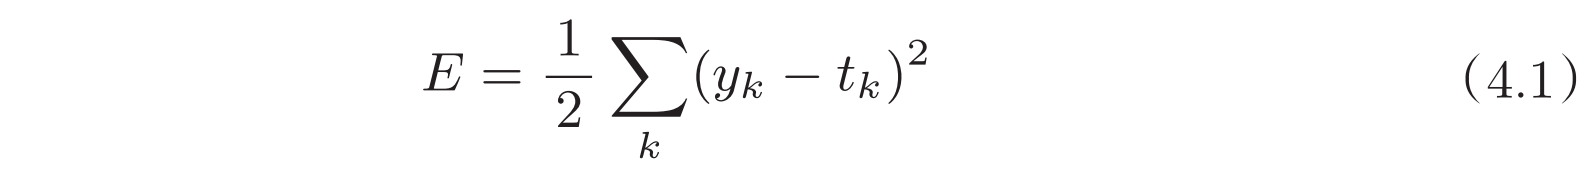

将正确解标签表示为1，其他标签表示为0的表示方法称为<font color=red>one-hot</font>表示

In [24]:
def mean_squared_error(y, t):
 return 0.5 * np.sum((y-t)**2)
# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 例1：“2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
# 例2：“7”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


第一个例子中，正确解是“2”，神经网络的输出的最大
值是“2”；第二个例子中，正确解是“2”，神经网络的输出的最大值是“7”。如
实验结果所示，我们发现第一个例子的损失函数的值更小，和监督数据之间的
误差较小。也就是说，均方误差显示第一个例子的输出结果与监督数据更加吻合。


#### <font color = 'silver'>4.2.2　交叉熵误差</font>
除了均方误差之外，交叉熵误差（cross entropy error）也经常被用作损
失函数。交叉熵误差如下式所示。
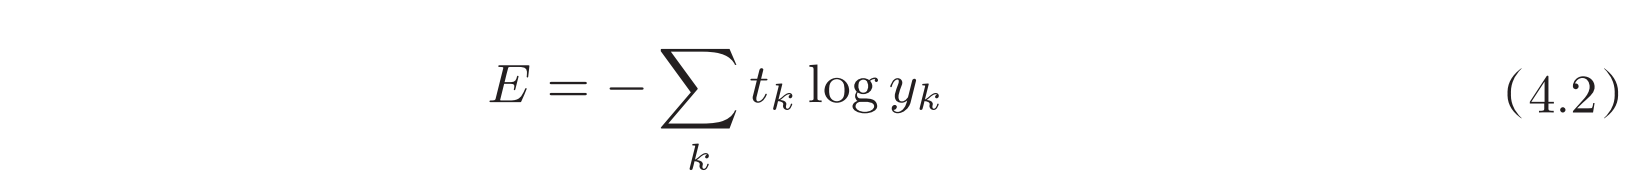

这里，log表示以e为底数的自然对数（log e
）。yk是神经网络的输出，tk是
正确解标签。并且，tk中只有正确解标签的索引为1，其他均为0（one-hot表示）。
因此，式（4.2）实际上只计算对应正确解标签的输出的自然对数。比如，假设
正确解标签的索引是“2”，与之对应的神经网络的输出是0.6，则交叉熵误差
是−log 0.6 = 0.51；若“2”对应的输出是0.1，则交叉熵误差为−log 0.1 = 2.30。
也就是说，交叉熵误差的值是由正确解标签所对应的输出结果决定的。

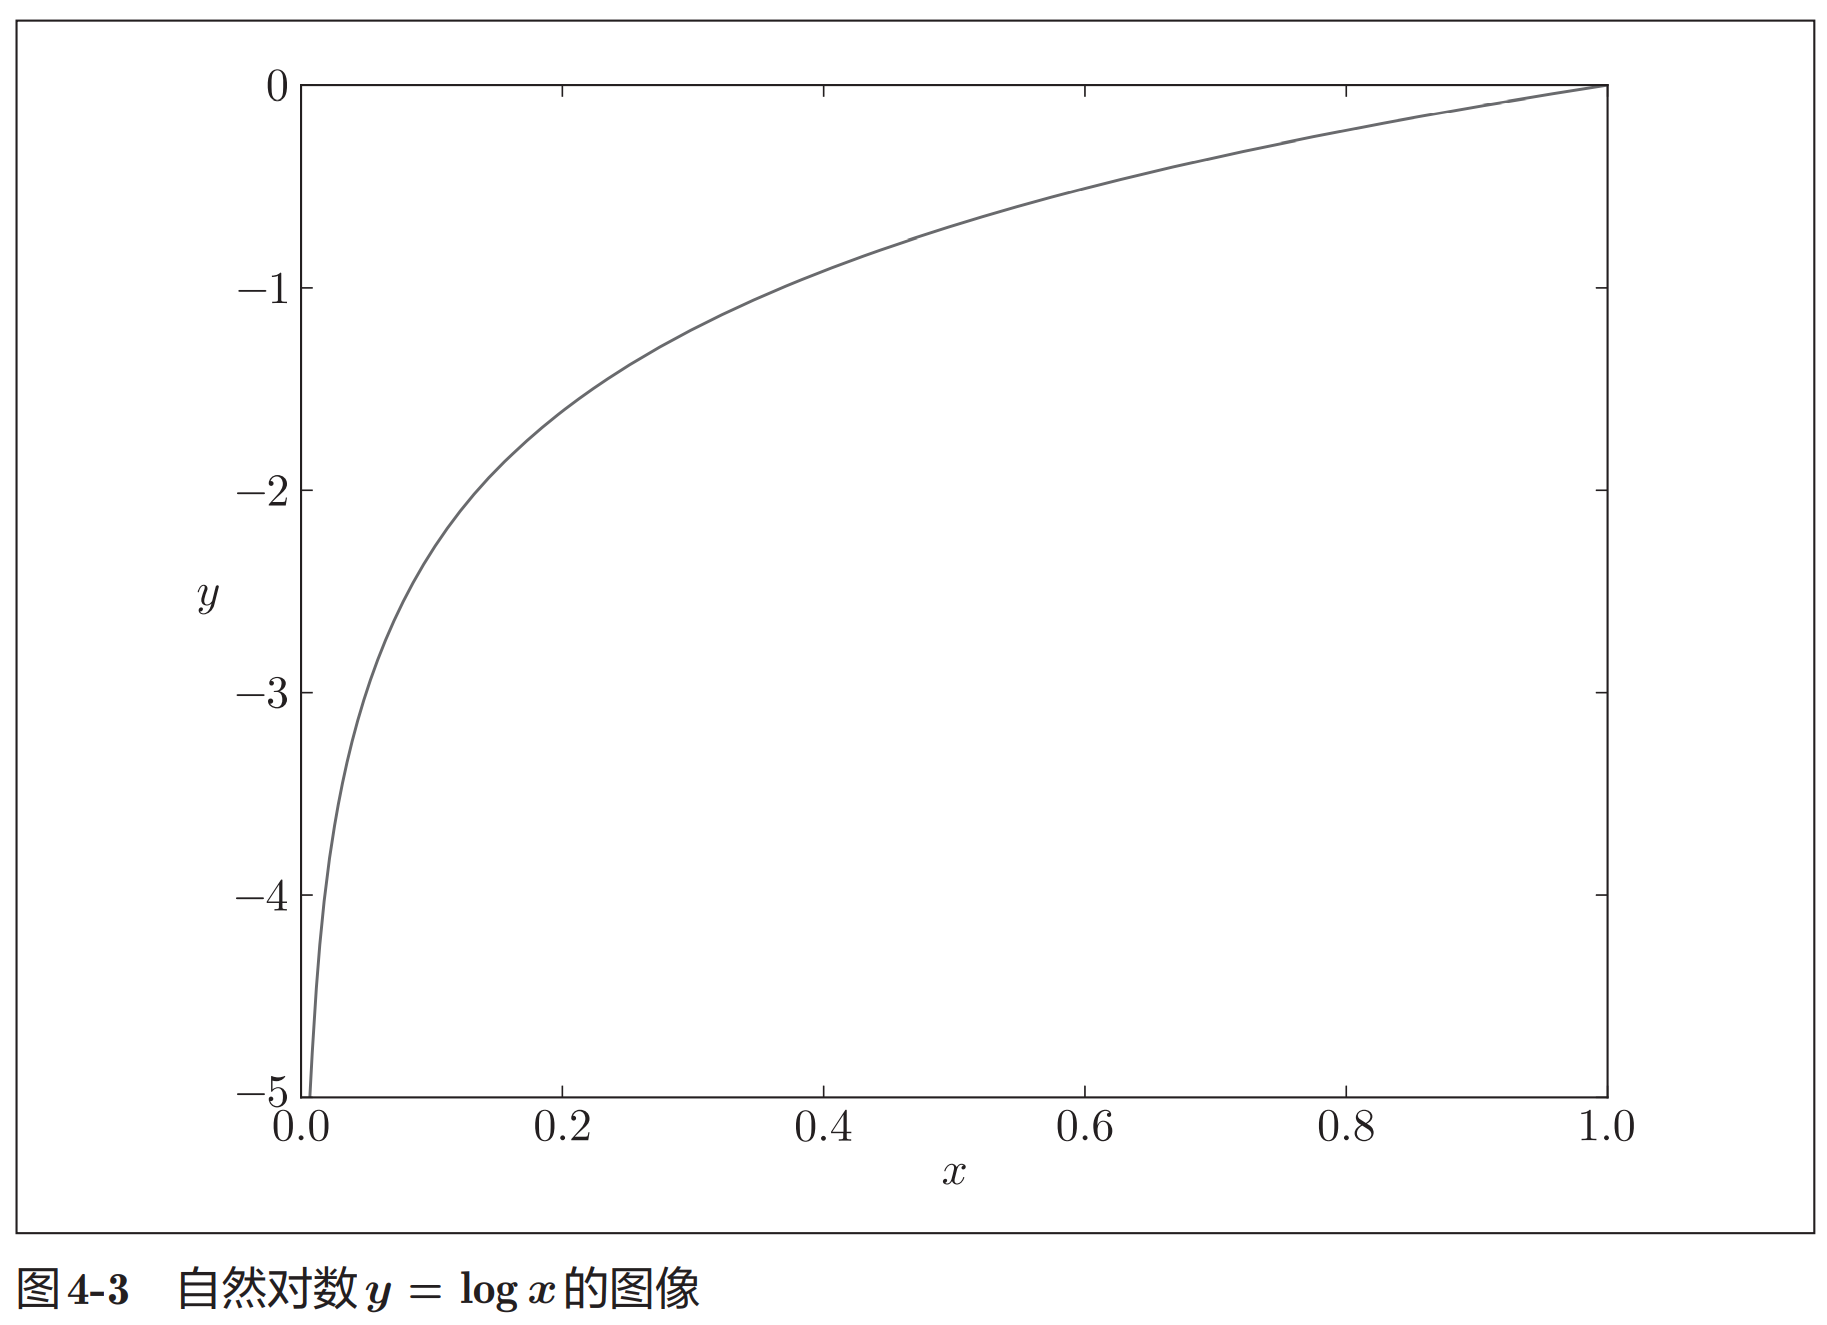

如图4-3所示，x等于1时，y为0；随着x向0靠近，y逐渐变小。因此，
正确解标签对应的输出越大，式（4.2）的值越接近0；当输出为1时，交叉熵
误差为0。此外，如果正确解标签对应的输出较小，则式（4.2）的值较大。

In [25]:
def cross_entropy_error(y, t):
 delta = 1e-7
 return -np.sum(t * np.log(y + delta))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


函数内部在计算np.log时，加上了一
个微小值delta。这是因为，当出现np.log(0)时，np.log(0)会变为负无限大
的-inf，这样一来就会导致后续计算无法进行。作为保护性对策，添加一个
微小值可以防止负无限大的发生。

#### <font color = 'silver'>4.2.3　mini-batch学习</font>
就是针对训练数据计算损失函数的值，找出使该值尽可能小的参数。因此，
计算损失函数时必须将所有的训练数据作为对象。也就是说，如果训练数据
有100个的话，我们就要把这100个损失函数的总和作为学习的指标。

所有训练数据的损失函数的总和，以交叉熵误差为例，可以写成下面
的式（4.3）。

假设数据有N个，tnk表示第n个数据的第k个元素的值（ynk是神
经网络的输出，tnk是监督数据）。

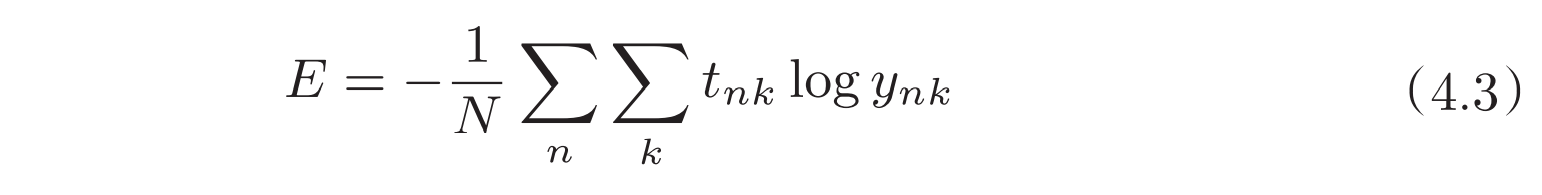

从60000个训练数据中随机
选择100笔，再用这100笔数据进行学习。这种学习方式称为mini-batch学习。

使用np.random.choice()可以从指定的数字中随机选择想要的数字。

In [26]:
 np.random.choice(60000, 10)

array([52692, 45379,   254,   713, 44316, 45288, 27994, 33849, 15529,
       24815])

#### <font color = 'silver'>4.2.4　mini-batch版交叉熵误差的实现</font>

In [27]:
def cross_entropy_error1(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [28]:
# 当监督数据是标签形式（非one-hot表示，而是像“2”“7”这样的标签）时，交叉熵误差可通过如下代码实现。
def cross_entropy_error2(y, t):
 if y.ndim == 1:
  t = t.reshape(1, t.size)
  y = y.reshape(1, y.size)
 batch_size = y.shape[0]
 return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

简单介绍一下np.log( y[np.arange(batch_size), t] )。np.arange 
(batch_size)会生成一个从0到batch_size-1的数组。t中标签是以[2, 7, 0, 9, 4]的形式存储的，所以y[np.arange(batch_size), t]能抽出各个数据的正确解标签对应的神经网络的输出

#### <font color = 'silver'>4.4 梯度</font>

由全部变量的偏导数汇总而成的向量称为梯度（gradient）。

0.1999999999990898


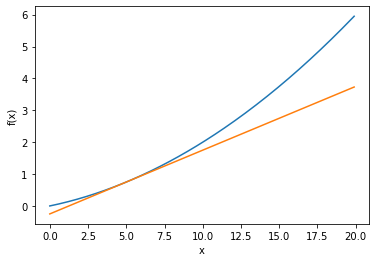

In [29]:
# 1维向量 求导
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

No handles with labels found to put in legend.


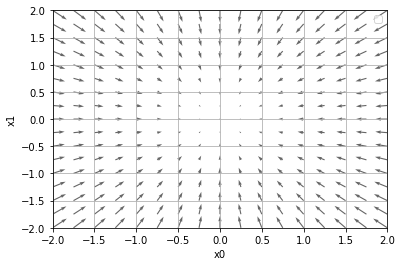

In [30]:
# 2维向量 求梯度
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

梯度指示的方向是各点处的函数值减小最多的方向

在梯度法中，函数的取值从当前位置沿着梯
度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，
如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，
逐渐减小函数值的过程就是梯度法（gradient method）。

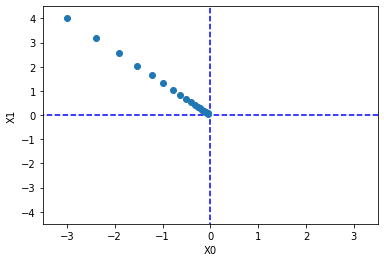

In [31]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

#### <font color = 'silver'>4.4.2　神经网络的梯度</font>

第1行第1列的元素 L/W11的偏微分 表示当w11稍微变化时，损失函数L会发生多大变化。这里的重点是偏微分的形状和W相同
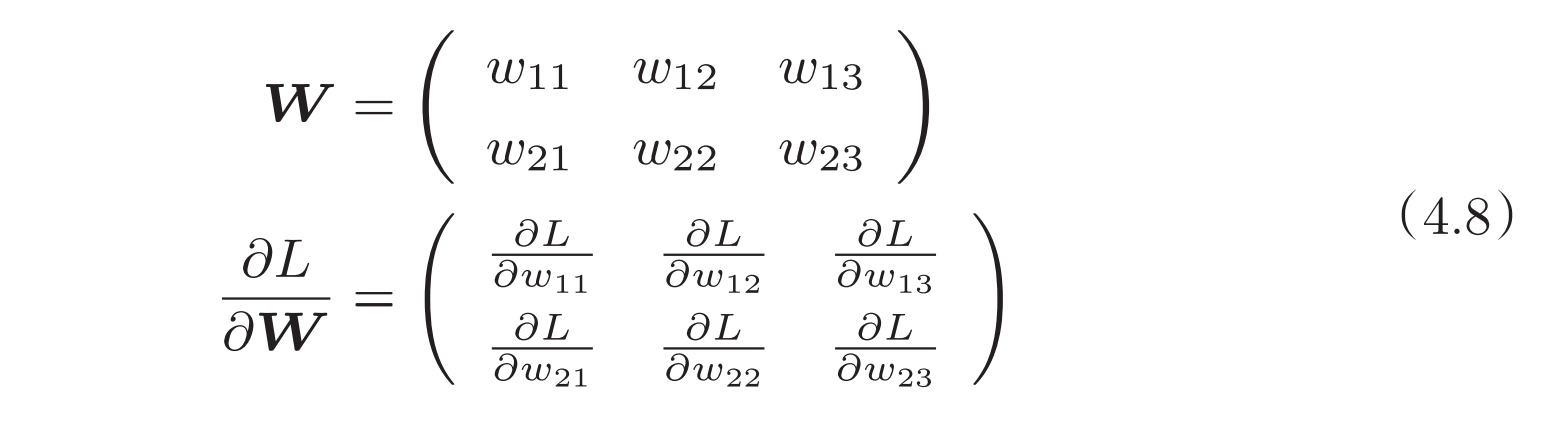

In [32]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.39692317  0.13307387 -0.52999704]
 [ 0.59538476  0.1996108  -0.79499556]]


#### <font color = 'silver'>4.5 学习算法的实现</font>